In [1]:
import os
import pickle
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score
import mlflow

In [10]:
# Configuração inicial
BASE_DIR = Path.cwd().parent  # Define o diretório atual como base (notebooks geralmente rodam no cwd)
MODEL_INPUT_PATH = BASE_DIR / 'data' / '05_model_input'
RESULTS_PATH = BASE_DIR / 'data' / '06_models'
RESULTS_PATH.mkdir(parents=True, exist_ok=True)

REPORTING_PATH = BASE_DIR / 'data' / '08_reporting'
REPORTING_PATH.mkdir(parents=True, exist_ok=True)

DT_MODEL_PATH = RESULTS_PATH / 'decision_tree_model.pkl'
LR_MODEL_PATH = RESULTS_PATH / 'logistic_regression_model.pkl'
RESULTS_FILE_PATH = RESULTS_PATH / 'results.csv'
SCATTER_PLOT_LR = REPORTING_PATH / 'lr_predictions_scatter.png'
SCATTER_PLOT_DT = REPORTING_PATH / 'dt_predictions_scatter.png'

In [11]:
MODEL_INPUT_PATH

WindowsPath('c:/Users/pesso/Documents/DevProjects/GitHubRepositories/ml_models/infnet_04_ml_engineering_pd/data/05_model_input')

In [14]:
# Ler os arquivos Parquet
X_train = pd.read_parquet(MODEL_INPUT_PATH / 'model_input_x_train.parquet')
X_test = pd.read_parquet(MODEL_INPUT_PATH / 'model_input_x_test.parquet')
y_train = pd.read_parquet(MODEL_INPUT_PATH / 'model_input_y_train.parquet')
y_test = pd.read_parquet(MODEL_INPUT_PATH / 'model_input_y_test.parquet')

In [13]:
# Inicializar os modelos
dt_model = DecisionTreeClassifier(random_state=17)
lr_model = LogisticRegression(random_state=17, max_iter=1000)

In [15]:
# Simulação de dados (substitua por seus próprios conjuntos de dados)
# X_train, y_train, X_test, y_test devem ser definidos anteriormente no notebook
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

c:\ProgramData\anaconda3\envs\env_25E1_3_v4\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=17)

In [16]:
# Fazer previsões
dt_predictions = dt_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

In [21]:
dt_predictions

array([False, False,  True, ..., False,  True,  True])

In [17]:
mlflow.log_metric("dt_accuracy", accuracy_score(y_test, dt_predictions))
mlflow.log_metric("lr_accuracy", accuracy_score(y_test, lr_predictions))
mlflow.log_metric("dt_log_loss", log_loss(y_test, dt_model.predict_proba(X_test)))
mlflow.log_metric("lr_log_loss", log_loss(y_test, lr_model.predict_proba(X_test)))
mlflow.log_metric("dt_precision", precision_score(y_test, dt_predictions, zero_division=0))
mlflow.log_metric("lr_precision", precision_score(y_test, lr_predictions, zero_division=0))
mlflow.log_metric("dt_recall", recall_score(y_test, dt_predictions, zero_division=0))
mlflow.log_metric("lr_recall", recall_score(y_test, lr_predictions, zero_division=0))
mlflow.log_metric("dt_f1_score", f1_score(y_test, dt_predictions, zero_division=0))
mlflow.log_metric("lr_f1_score", f1_score(y_test, lr_predictions, zero_division=0))

In [18]:
# Salvar os resultados em um arquivo CSV
results = {
    "Model": ["Decision Tree", "Logistic Regression"],
    "Accuracy": [accuracy_score(y_test, dt_predictions), accuracy_score(y_test, lr_predictions)],
    "Log Loss": [log_loss(y_test, dt_model.predict_proba(X_test)), log_loss(y_test, lr_model.predict_proba(X_test))],
    "Precision": [precision_score(y_test, dt_predictions, zero_division=0), precision_score(y_test, lr_predictions, zero_division=0)],
    "Recall": [recall_score(y_test, dt_predictions, zero_division=0), recall_score(y_test, lr_predictions, zero_division=0)],
    "F1-Score": [f1_score(y_test, dt_predictions, zero_division=0), f1_score(y_test, lr_predictions, zero_division=0)],
}

results_df = pd.DataFrame(results)

results_df

Model  Accuracy   Log Loss  Precision    Recall  F1-Score
0        Decision Tree  0.534295  14.468162   0.580034  0.626920  0.602566
1  Logistic Regression  0.563131   0.675047   0.583265  0.785296  0.669369

Text(0.5, 1.0, 'Previsões Logistic Regression (lon x lat)')

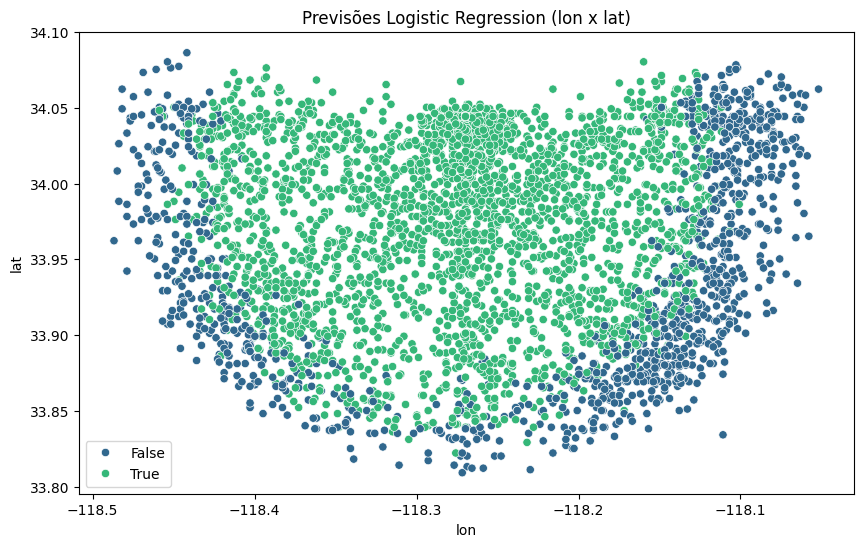

In [19]:
# Gerar gráfico para Logistic Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test["lon"], y=X_test["lat"], hue=lr_predictions, palette='viridis')
plt.title("Previsões Logistic Regression (lon x lat)")

In [22]:
X_test

lat       lon  minutes_remaining  period  playoffs  shot_distance
0     33.9403 -118.2668                  7       3      True             10
1     33.9883 -118.1468                 11       1     False             13
2     34.0443 -118.2698                  2       1     False              0
3     34.0443 -118.2698                  1       2     False              0
4     34.0443 -118.2698                  7       1      True              0
...       ...       ...                ...     ...       ...            ...
4850  33.8633 -118.3288                  0       3     False             19
4851  33.8813 -118.1338                  1       3     False             21
4852  34.0263 -118.1718                  3       3     False              9
4853  33.9453 -118.3488                  2       2     False             12
4854  34.0443 -118.2698                 11       2     False              0

[4855 rows x 6 columns]

In [23]:
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de lr_predictions:", len(lr_predictions))
print("Primeiros valores de lr_predictions:", lr_predictions[:10])
print("Colunas em X_test:", X_test.columns)
print("Valores nulos em 'lon':", X_test["lon"].isna().sum())
print("Valores nulos em 'lat':", X_test["lat"].isna().sum())
unique_predictions = pd.Series(lr_predictions).unique()
print("Valores únicos em lr_predictions:", unique_predictions)

Tamanho de X_test: (4855, 6)
Tamanho de lr_predictions: 4855
Primeiros valores de lr_predictions: [ True  True  True  True  True  True  True  True  True  True]
Colunas em X_test: Index(['lat', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'shot_distance'],
      dtype='object')
Valores nulos em 'lon': 0
Valores nulos em 'lat': 0
Valores únicos em lr_predictions: [ True False]


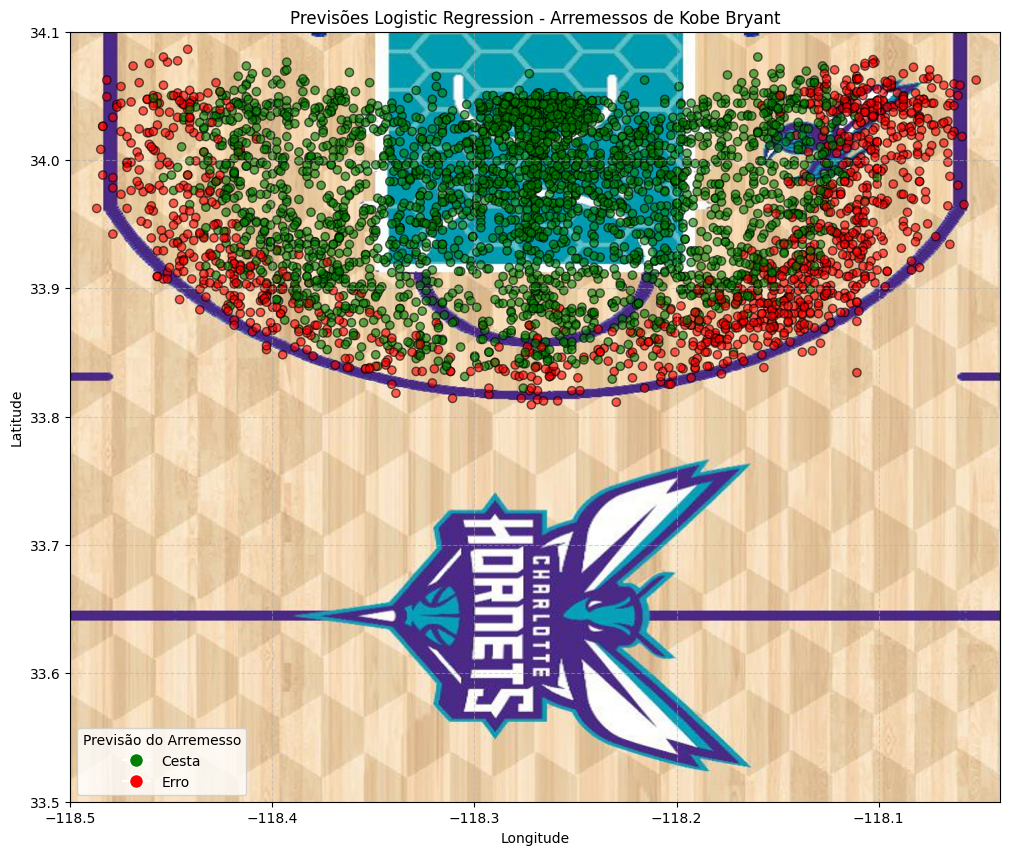

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

def plot_logistic_regression_predictions(X_test, lr_predictions):
    """
    Gera um gráfico com as previsões do modelo de Regressão Logística
    sobre uma quadra de basquete estilizada.
    """
    # Remover duplicatas para evitar sobreposições desnecessárias
    data = X_test.copy()
    data['lr_predictions'] = lr_predictions  # Adiciona as previsões ao DataFrame
    data = data.drop_duplicates()

    # Mapear valores de previsões para cores
    colors = data['lr_predictions'].map({True: 'green', False: 'red'})  # 1 = Cesta, 0 = Erro

    # Criar o gráfico de dispersão com tamanho ajustado
    fig, ax = plt.subplots(figsize=(12, 10))  # Tamanho maior para melhor visibilidade

    # Carregar a imagem da quadra de basquete
    img = mpimg.imread('assets/basket_court2.png')  # Atualize para o caminho correto

    # Definir os limites da quadra
    lon_min, lon_max = -118.5, -118.04  # Ajuste conforme necessário
    lat_min, lat_max = 33.5, 34.1      # Ajustado para a escala do dataset

    # Exibir a imagem da quadra como fundo
    ax.imshow(img, extent=[lon_min, lon_max, lat_min, lat_max], aspect='auto')

    # Adicionar os dados de previsões no gráfico
    scatter = ax.scatter(
        data['lon'], data['lat'], c=colors, alpha=0.6, edgecolors='k'
    )

    # Adicionar uma legenda manual
    legend_labels = {'green': 'Cesta', 'red': 'Erro'}
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color)
        for color in legend_labels.keys()
    ]
    ax.legend(handles, legend_labels.values(), title="Previsão do Arremesso")

    # Configurar título e rótulos dos eixos
    ax.set_title("Previsões Logistic Regression - Arremessos de Kobe Bryant")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(True, linestyle='--', alpha=0.5)

    # Ajustar limites do gráfico
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)

    # Exibir o gráfico final
    plt.show()


# Chamar a função
plot_logistic_regression_predictions(X_test, lr_predictions)

In [ ]:
# Gerar gráfico para Logistic Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test["lon"], y=X_test["lat"], hue=lr_predictions, palette='viridis')
plt.title("Previsões Logistic Regression (lon x lat)")
plt.savefig(SCATTER_PLOT_LR, dpi=300)
mlflow.log_artifact(str(SCATTER_PLOT_LR))
plt.close()
print(f"Gráfico Logistic Regression salvo e registrado no MLflow: {SCATTER_PLOT_LR}")

# Gerar gráfico para Decision Tree
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test["lon"], y=X_test["lat"], hue=dt_predictions, palette='viridis')
plt.title("Previsões Decision Tree (lon x lat)")
plt.savefig(SCATTER_PLOT_DT, dpi=300)
mlflow.log_artifact(str(SCATTER_PLOT_DT))
plt.close()
print(f"Gráfico Decision Tree salvo e registrado no MLflow: {SCATTER_PLOT_DT}")

mlflow.end_run()

In [26]:
# Configuração inicial
MODEL_OUTPUT_PATH = BASE_DIR / 'data' / '07_model_output'

df2 = pd.read_csv(MODEL_OUTPUT_PATH / 'predictions_with_features.csv')

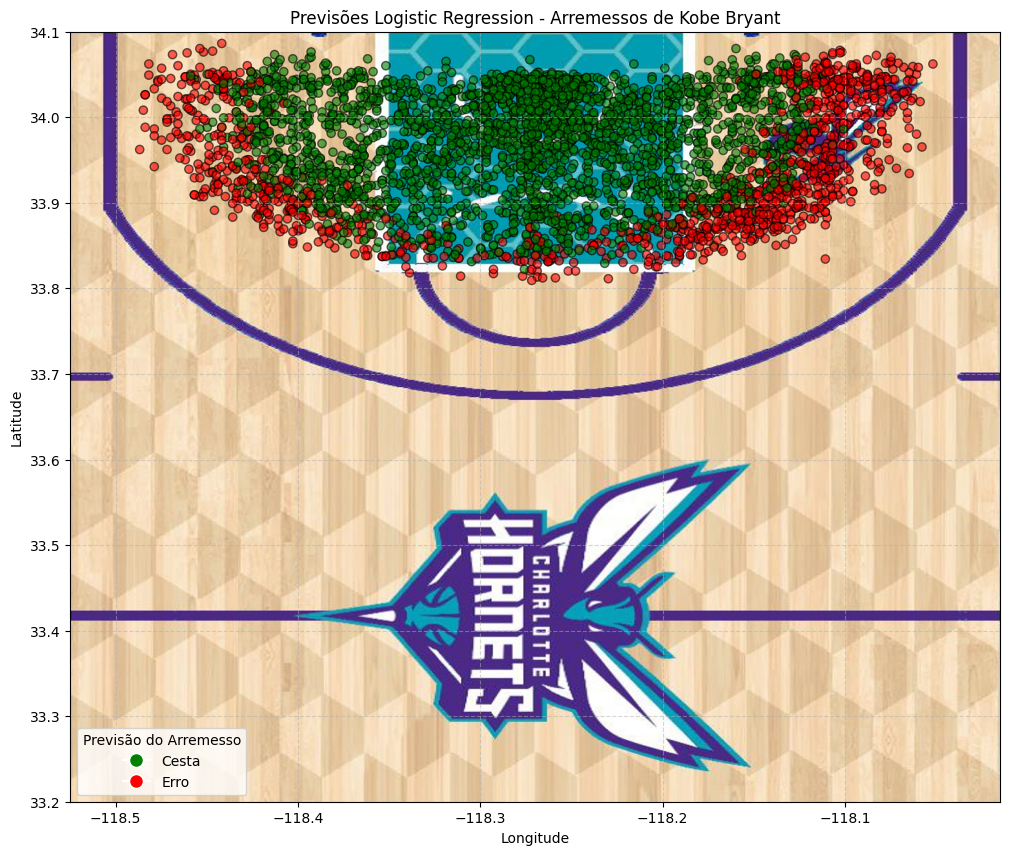

In [123]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

def plot_logistic_regression_predictions(X_test, dt_predictions):
    """
    Gera um gráfico com as previsões do modelo de Regressão Logística
    sobre uma quadra de basquete estilizada.
    """
    # Remover duplicatas para evitar sobreposições desnecessárias
    data = X_test.copy()
    data['dt_predictions'] = dt_predictions  # Adiciona as previsões ao DataFrame
    data = data.drop_duplicates()

    # Mapear valores de previsões para cores
    colors = data['dt_predictions'].map({True: 'green', False: 'red'})  # 1 = Cesta, 0 = Erro

    # Criar o gráfico de dispersão com tamanho ajustado
    fig, ax = plt.subplots(figsize=(12, 10))  # Tamanho maior para melhor visibilidade

    # Carregar a imagem da quadra de basquete
    img = mpimg.imread('assets/basket_court2.png')  # Atualize para o caminho correto

    # Definir os limites da quadra
    lon_min, lon_max = -118.525, -118.015  # Ajuste conforme necessário
    lat_min, lat_max = 33.2, 34.1      # Ajustado para a escala do dataset

    # Exibir a imagem da quadra como fundo
    ax.imshow(img, extent=[lon_min, lon_max, lat_min, lat_max], aspect='auto')

    # Adicionar os dados de previsões no gráfico
    scatter = ax.scatter(
        data['lon'], data['lat'], c=colors, alpha=0.6, edgecolors='k'
    )

    # Adicionar uma legenda manual
    legend_labels = {'green': 'Cesta', 'red': 'Erro'}
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color)
        for color in legend_labels.keys()
    ]
    ax.legend(handles, legend_labels.values(), title="Previsão do Arremesso")

    # Configurar título e rótulos dos eixos
    ax.set_title("Previsões Logistic Regression - Arremessos de Kobe Bryant")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(True, linestyle='--', alpha=0.5)

    # Ajustar limites do gráfico
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)

    # Exibir o gráfico final
    plt.show()


# Chamar a função
plot_logistic_regression_predictions(X_test, lr_predictions)

In [37]:
df2.columns

Index(['lat', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'shot_distance', 'decision_tree_hat', 'logistic_regression_hat'],
      dtype='object')

In [40]:
# Obter os valores máximo e mínimo das colunas 'lon' e 'lat'
lon_min = df2['lon'].min()
lon_max = df2['lon'].max()

lat_min = df2['lat'].min()
lat_max = df2['lat'].max()

print(f"Longitude - Min: {lon_min}, Max: {lon_max}")
print(f"Latitude - Min: {lat_min}, Max: {lat_max}")

Longitude - Min: -118.5198, Max: -118.0218
Latitude - Min: 33.2533, Max: 34.0793


In [38]:
lr2 = df2['decision_tree_hat']

In [33]:
X_test2 = df2[['lat', 'lon', 'minutes_remaining', 'period', 'playoffs', 'shot_distance']]

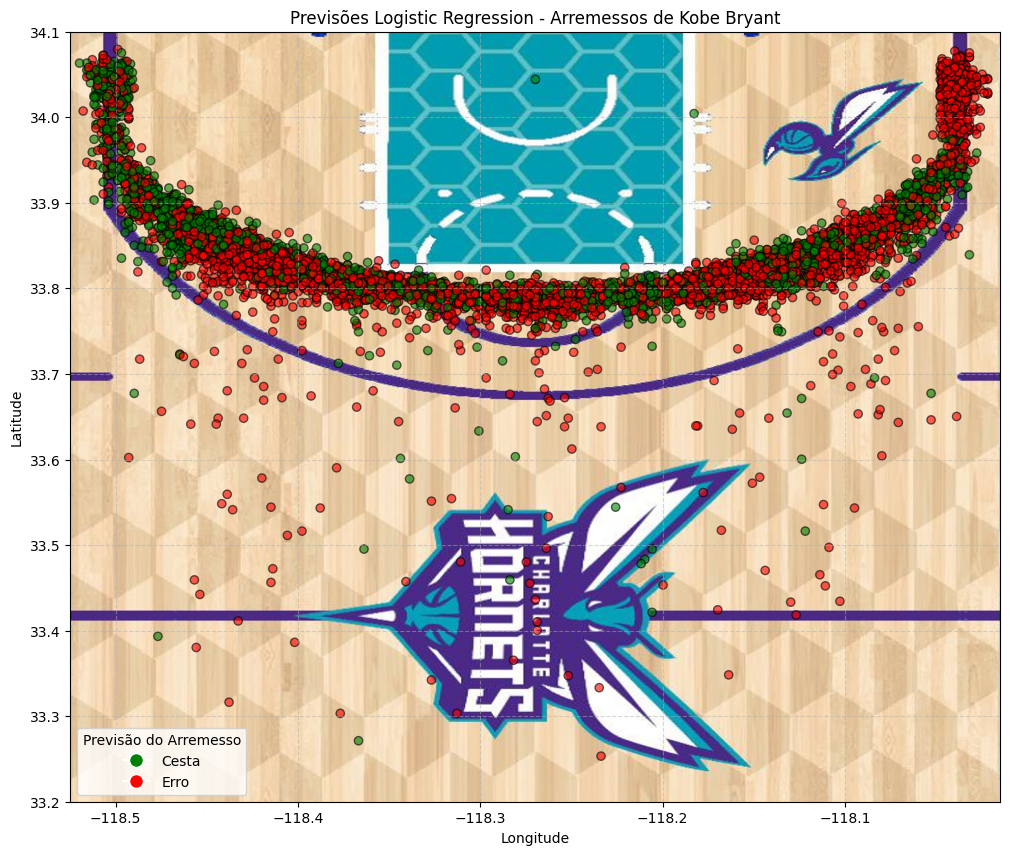

In [124]:
plot_logistic_regression_predictions(X_test2, lr2)